# Computational Statistics Lab:

### 1.	Write a python program to find the best fit straight line and draw the scatter plot

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def myMean(data):
    mean = 0
    for i in np.nditer(data):
        mean += i
    mean /= len(data)
    return mean

Enter x values: 1 2 3 4 6 8
Enter y values: 2.4 3 3.6 4 5 6
The calculated straight line y=1.9765+0.5059x is the best fit to the given data


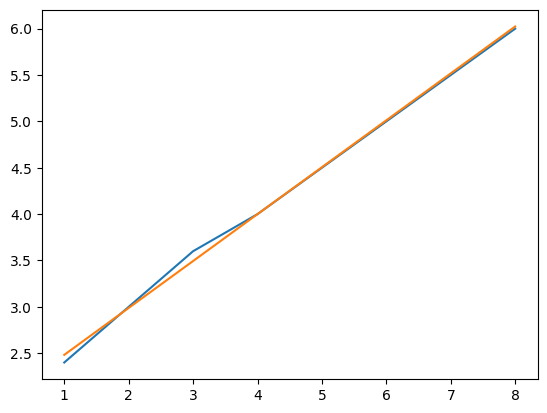

In [6]:
x = np.array([float(i) for i in input("Enter x values: ").split()])
y = np.array([float(i) for i in input("Enter y values: ").split()])

x2 = x * x
xy = x * y

m = (len(x)*sum(xy) - sum(x)*sum(y)) / (len(x)*sum(x2) - (sum(x))**2)

c = (sum(y) - m*sum(x)) / len(x)

line = lambda k : (m*k + c)
ycal = line(x)

plt.plot(x,y)
plt.plot(x,ycal)

ybar = myMean(y)

sse = sum((y-ycal)**2)
ssr = sum((ycal-ybar)**2)
sst = ssr + sse

r2 = ssr/sst

if r2 > 0.9:
    print(f'The calculated straight line y={round(c,4)}+{round(m,4)}x is the best fit to the given data')
else:
    print(f'The calculated straight line y={round(c,4)}+{round(m,4)}x is not the best fit to the given data')

### 2.	Write a python program to fit a second degree parabola of the form $y=a+bx+cx^{2}$ and draw the scatter plot.

In [30]:
def det(mat):
    v1 = mat[0,0] * ((mat[1,1] * mat[2,2]) - (mat[1,2] * mat[2,1]))
    v2 = -mat[0,1] * ((mat[1,0] * mat[2,2]) - (mat[1,2] * mat[2,0]))
    v3 = mat[0,2] * ((mat[1,0] * mat[2,1]) - (mat[1,1] * mat[2,0]))
    return v1+v2+v3

Enter x values: 0 1 2 3 4
Enter y values: 1 1.8 1.3 2.5 6.3
The calculated parabola y=1.42+-1.07x+0.55x^2 is the best fit to the given data


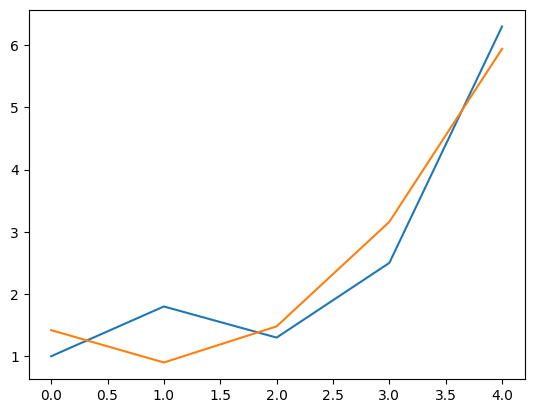

In [34]:
x = np.array([float(i) for i in input("Enter x values: ").split()])
y = np.array([float(i) for i in input("Enter y values: ").split()])
x2, x3, x4, xy, x2y = x**2, x**3, x**4, x*y, (x**2)*y
ybar = myMean(y)

mat = np.array([[len(x), sum(x), sum(x2)], [sum(x), sum(x2), sum(x3)], [sum(x2), sum(x3), sum(x4)]])
v = np.array([[sum(y)], [sum(xy)], [sum(x2y)]])

d = det(mat)
mat1 = np.hstack((v,mat[:,[1,2]]))
d1 = det(mat1)
mat2 = np.hstack((mat[:,[0]],v,mat[:,[2]]))
d2 = det(mat2)

mat3 = np.hstack((mat[:,[0,1]],v))
d3 = det(mat3)

a, b, c = d1/d, d2/d, d3/d
ycal = a+b*x+c*(x**2)

sse = sum((y-ycal)**2)
ssr = sum((ycal-ybar)**2)
sst = ssr + sse

r2 = ssr/sst

plt.plot(x, y)
plt.plot(x, ycal)

if r2>0.9:
    print(f'The calculated parabola y={round(a,4)}+{round(b,4)}x+{round(c,4)}x^2 is the best fit to the given data')
else:
    print(f'The calculated parabola y={round(a,4)}+{round(b,4)}x+{round(c,4)}x^2 is the not best fit to the given data')

### 3. Write a python program to find Karl Pearson’s correlation coefficient. 

In [32]:
def mySd(x):
    x2, xbar2 = x*x, myMean(x)**2
    val = ((1/len(x))*sum(x2-xbar2))**(0.5)
    return val

In [35]:
x = np.array([float(i) for i in input("Enter x values: ").split()])
y = np.array([float(i) for i in input("Enter y values: ").split()])

x2, y2, xy, xbar, ybar = x*x, y*y, x*y, myMean(x), myMean(y)
sdx = mySd(x)
sdy = mySd(y)

cov = (1/len(x)*sum(xy))-(xbar*ybar)
r = cov/(sdx*sdy)
print(f"The Pearson's correlation coeffecient is: {round(r,4)}")

Enter x values: 6 8 9 10 11 12 14 16
Enter y values: 14 17 15 18 16 22 25 26
The Pearson's correlation coeffecient is: 0.9201


### 4. Write a python program to find the Spearman’s correlation coefficient between x and y variables.

In [52]:
def calRank(data):
    Ranks = []
    
    n = len(data)
    
    for i in range(n):
        bigs = 1
        same = 0
        
        for j in range(i):
            if data[j] > data[i]:
                bigs += 1
            elif data[j] == data[i]:
                same += 1
        
        for j in range(i+1, n):
            if data[j] > data[i]:
                bigs += 1
            elif data[j] == data[i]:
                same += 1
        Ranks.append(bigs + same/2)
    return np.array(Ranks)

In [53]:
def cf(x, y):
    cf = 0
    
    setX, freqX = np.unique(x, return_counts=True)
    setY, freqY = np.unique(y, return_counts=True)
    for i in range(len(setX)):
        if freqX[i] > 1:
            cf += freqX[i] * (freqX[i]**2 - 1) / 12
    for i in range(len(setY)):
        if freqY[i] > 1:
            cf += freqY[i] * (freqY[i]**2 - 1) / 12
    return cf

In [55]:
x = np.array([float(i) for i in input("Enter x values: ").split()])
y = np.array([float(i) for i in input("Enter y values: ").split()])
n = len(x)
print("X=", x)
print("Y=", y)
xrank = calRank(x)
yrank = calRank(y)

di = xrank - yrank
di2 = di**2

print("di=", di)
print("di^2=", di2)

correcFac = cf(x, y)
sigDi2 = sum(di2) + correcFac

corr = 1 - (6*sigDi2)/(n*(n**2-1))

print("Sum of di^2=", sigDi2)
print("Correction factor=", correcFac)
print("Correlation coeffecient=", corr)

Enter x values: 80 90 84 78 69 56 92 76 68 50
Enter y values: 12 14 19 8 9 16 13 11 4 2
X= [80. 90. 84. 78. 69. 56. 92. 76. 68. 50.]
Y= [12. 14. 19.  8.  9. 16. 13. 11.  4.  2.]
di= [-1. -1.  2. -3.  0.  7. -3.  0. -1.  0.]
di^2= [ 1.  1.  4.  9.  0. 49.  9.  0.  1.  0.]
Sum of di^2= 74.0
Correction factor= 0
Correlation coeffecient= 0.5515151515151515


### 5. Write a python program to classify the data based on one way ANOVA

In [2]:
import scipy.stats as ss
alpha = float(input("Enter the level of significance: "))

k = int(input("Enter the number of treatments: "))

# tr = [[13, 10, 8, 11, 8], [13, 11, 14, 14], [4, 1, 3, 4, 2, 4]]
tr = []

print("Enter the values of treatments: ")
for i in range(k):
    vals = [float(j) for j in input(f"Treatment {i+1}: ").split()]
    tr.append(vals)
   
G = 0
N = 0
RSS = 0
sigTi2N = 0

for i in range(k):
    ti2 = 0
    ni = 0
    for j in tr[i]:
        N += 1
        ni += 1
        RSS += j**2
        G += j
        ti2 += j
    sigTi2N += (ti2**2)/ni

CF = G**2/N
SST = RSS - CF
SStr = sigTi2N - CF
SSe = SST - SStr

MSStr = SStr/(k-1)
MSSe = SSe/(N-k)

Fcal = MSStr/MSSe

if Fcal < 1: Fcal = MSSe/MSStr

FTable = ss.f.ppf(1-alpha, k-1, N-k)

if Fcal > FTable:
    print(f"Fcal>Ftable ({Fcal}>{round(FTable,4)}) We reject H0 and accept H1, i.e., there is no homogenity among the means")
else:
    print(f"Fcal<=Ftable ({Fcal}<={round(FTable,4)}) We accept H0,i.e., there is homogenity among the means")

Enter the level of significance: 0.05
Enter the number of treatments: 3
Enter the values of treatments: 
Treatment 1: 13 10 8 11 8
Treatment 2: 13 11 14 14
Treatment 3: 4 1 3 4 2 4
Fcal>Ftable (50.625>3.8853) We reject H0 and accept H1, i.e., there is no homogenity among the means


### 6. Write a python program to classify the data based on two way Anova.

In [5]:
import scipy.stats as ss
alpha = float(input("Enter the level of significance: "))

k = int(input("Enter the number of treatments: "))
h = int(input("Enter the number of blocks: "))

# tr = np.array([[75, 73 ,59,69, 84], [83, 72, 56, 70, 92], [86, 61, 53, 72, 88],[73, 67, 62, 79, 95]])
tr = []
print("Enter the values of treatments: ")
for i in range(k):
    vals = [float(j) for j in input(f"Treatment {i+1}: ").split()]
    tr.append(vals)
tr = np.array(tr)
N, RSS = 0, 0
Ti = [0 for i in range(k)]
Bj = [0 for i in range(h)]

for i in range(k):
    for j in range(h):
        N += 1
        RSS += tr[i,j]**2
        Ti[i] += tr[i,j]
        Bj[j] += tr[i,j]

G = sum(Ti)
Ti2 = sum([i**2 for i in Ti])
Bj2 = sum([i**2 for i in Bj])

CF = G**2/N
SST = RSS - CF
SStr = (1/h)*Ti2 - CF
SSb = (1/k)*Bj2 - CF
SSe = SST - SStr - SSb

MSStr = SStr/(k-1)
MSSb = SSb/(h-1)
MSSe = SSe/((k-1)*(h-1))

Ftr = MSStr/MSSe if MSStr/MSSe>1 else MSSe/MSStr
Fb = MSSb/MSSe if MSSb/MSSe>1 else MSSe/MSSb

FtrTab = ss.f.ppf(1-alpha, k-1, (k-1)*(h-1))
FbTab = ss.f.ppf(1-alpha, h-1, (k-1)*(h-1))

print("Inference related to treatments: ")
if Ftr >= FtrTab:
    print(f"Ftr >= Ftab ({Ftr} >= {round(FtrTab,4)}), we reject H0 and accept H1,i.e.,there is significant different among the treatments")
else:
    print(f"Ftr < Ftab ({Ftr} < {round(FtrTab,4)}), we accept H0, i.e.,there is no significant different among the treatments")

print("Inference related to blocks")
if Fb >= FbTab:
    print(f"Fb >= Ftab ({Fb} >= {round(FbTab,4)}), we reject H0 and accept H1,i.e.,there is significant different among the blocks")
else:
    print(f"Fb < Ftab ({Fb} < {round(FbTab,4)}), we accept H0, i.e.,there is no significant different among the treatments")

Enter the level of significance: 0.05
Enter the number of treatments: 4
Enter the number of blocks: 5
Enter the values of treatments: 
Treatment 1: 75 73 59 69 84
Treatment 2: 83 72 56 70 92
Treatment 3: 86 61 53 72 88
Treatment 4: 73 67 62 79 95
Inference related to treatments: 
Ftr < Ftab (1.9749708963913033 < 3.4903), we accept H0, i.e.,there is no significant different among the treatments
Inference related to blocks
Fb >= Ftab (20.57206012378406 >= 3.2592), we reject H0 and accept H1,i.e.,there is significant different among the blocks


### 7. Write a python program to fit a multiple regression model for any given data.

In [8]:
import numpy as np
import scipy.stats as ss

In [3]:
def multiply(a, b):
    if a.shape[1] != b.shape[0]:
        print("Cannot multiply the matrices!!")
        return None
    c = np.zeros([a.shape[0],b.shape[1]], dtype=float)
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                c[i, j] += a[i, k] * b [k, j]
    return c

In [172]:
def transpose(mat):
    result = np.zeros((mat.shape[1], mat.shape[0]), dtype=float)
        
    for i in range(mat.shape[0]):
   # iterate through columns
       for j in range(mat.shape[1]):
           result[j, i] = mat[i, j]
    return result

In [109]:
def recursiveDet(mat):
    if mat.shape == (2,2):
        return mat[0,0]*mat[1,1] - mat[0,1]*mat[1,0]
    total = 0
    for c in range(mat.shape[0]):
        matCopy = np.copy(mat)
        matCopy = matCopy[1:]
        matCopy = np.delete(matCopy, c, 1)
        sign = (-1)**(c%2)
        sub_det = recursiveDet(matCopy)
        total += sign*mat[0, c]*sub_det
    return total

In [168]:
def matInv(mat):
    det = recursiveDet(mat)
    adj = np.zeros(mat.shape, dtype=float)
    for r in range(mat.shape[0]):
        matC = np.copy(mat)
        matC = np.delete(matC, r, 0)
        for c in range(matC.shape[1]):
            sign = (-1)**((c+1)%2) if r%2==1 else (-1)**(c%2)
            matC2 = np.delete(matC, c, 1)
            adj[r, c] = sign * recursiveDet(matC2)
    adj = adj/det
    return adj

In [112]:
def myMean(arr):
    mean = 0
    count = 0
    for i in np.nditer(arr):
        mean += i
        count += 1
    mean /= count
    return mean

In [179]:
# y = np.array([[11], [11], [8], [2],[5], [5], [4]])
# x = np.array([[1, -5, 5], [1, -4, 4], [1, -1, 1], [1, 2, -3], [1, 2, -2], [1, 3, -2], [1, 3, -3]])

p = int(input("Enter number of variables: "))
n = int(input("Enter number of observations: "))
x = np.array([[1] for i in range(n)])
y = np.array([[float(i)] for i in input("Enter values of y: ").split()])

for i in range(p-1):    
    xvar = np.array([[float(j)] for j in input(f"Enter values of x{i+1}: ").split()])
    x = np.hstack((x, xvar))

xt = transpose(x)
xtx = multiply(xt,x)
xtxi = matInv(xtx)
xty = multiply(xt, y)
mlr = multiply(xtxi, xty)
yFunc = lambda x1, x2: mlr[0]+mlr[1]*x1+mlr[2]*x2
ycap = yFunc(x[:,1], x[:,2])
ycap = np.array([[i] for i in ycap])
Ei = y-ycap
# Goodness of fit
print('Goodness of fit by coeffecient of determination:')
sse = sum(Ei**2)
sst = sum((y-myMean(y))**2)
ssr = sst - sse

r2 = ssr/sst

if r2 < 0.9:
    print("The model is not a good fit")
else:
    print("The model is a good fit")
    
# ANOVA 
print('\nANOVA:')
alpha = 0.05
n = y.shape[0]

MSSr = ssr/(p - 1)
MSSe = sse/(n - p)

F = MSSr/MSSe if MSSr/MSSe>0 else MSSe/MSSr
Ftab = ss.f.ppf(1 - alpha, p-1, n-p)

if F > Ftab:
    print('We reject H0, i.e., there is atleast one regression parameter which is influencing the model')
else:
    print('We accept H0, i.e., there is no regression parameter which is influencing the model')

Enter number of variables: 3
Enter number of observations: 7
Enter values of y: 11 11 8 2 5 5 4
Enter values of x1: -5 -4 -1 2 2 3 3
Enter values of x2: 5 4 1 -3 -2 -2 -3
Goodness of fit by coeffecient of determination:
The model is a good fit

ANOVA:
We reject H0, i.e., there is atleast one regression parameter which is influencing the model


11 11 8 2 5 5 4
-5 -4 -1 2 2 3 3
5 4 1 -3 -2 -2 -3

### 8. Write a python program to fit a multivariate regression model for any given data.

In [180]:
import numpy as np
np.set_printoptions(suppress=True)

In [93]:
def multiply(a, b):
    if a.shape[1] != b.shape[0]:
        print("Cannot multiply the matrices!!")
        return None
    c = np.zeros([a.shape[0],b.shape[1]])
    for i in range(a.shape[0]):
        for j in range(b.shape[1]):
            for k in range(b.shape[0]):
                c[i, j] += a[i, k] * b [k, j]
    return c

In [94]:
def transpose(mat):
    result = np.zeros((mat.shape[1],mat.shape[0]))
    for i in range(mat.shape[0]):
   # iterate through columns
       for j in range(mat.shape[1]):
           result[j, i] = mat[i, j]
    return result

In [95]:
def recursiveDet(mat):
    if mat.shape == (2,2):
        return mat[0,0]*mat[1,1] - mat[0,1]*mat[1,0]
    total = 0
    for c in range(mat.shape[0]):
        matCopy = np.copy(mat)
        matCopy = matCopy[1:]
        matCopy = np.delete(matCopy, c, 1)
        sign = (-1)**(c%2)
        sub_det = recursiveDet(matCopy)
        total += sign*mat[0, c]*sub_det
    return total

In [102]:
def myInv(mat):
    det = recursiveDet(mat)
    adj = np.zeros(mat.shape, dtype=float)
    for r in range(mat.shape[0]):
        matC = np.copy(mat)
        matC = np.delete(matC, r, 0)
        for c in range(matC.shape[1]):
            matC2 = np.delete(matC, c, 1)
            adj[r, c] = ((-1)**(c%2)) * recursiveDet(matC2)
    adj = adj/det
    return adj

In [108]:
p1 = int(input("Enter the number of y variables: "))
p2 = int(input("Enter the number of x variables: "))
n = int(input("Enter the number of observations: "))

# y = np.array([[10, 100], [12, 110], [11, 105], [9, 94], [9, 95], [10, 99], [11, 104], [12, 108], [11, 105], [10, 98], [11, 103], [12, 110]])
# x = np.array([[1, 9, 62, 1.0], [1, 8, 58, 1.3], [1, 7, 64, 1.2], [1, 14, 60, 0.8], [1, 12, 63, 0.8], [1, 10, 57, 0.9], [1, 7, 55, 1.0], [1, 4, 56, 1.2], [1, 6, 59, 1.1], [1, 5, 61, 1.0], [1, 7, 57, 1.2], [1, 6, 60, 1.2]])
y = np.array([[float(j)] for j in input(f"Enter values of y1: ").split()])
for i in range(1, p1):
    yvar = np.array([[float(j)] for j in input(f"Enter values of y{i+1}: ").split()])
    y = np.hstack((y,yvar))
x = np.array([[1] for i in range(n)])
for i in range(p2):
    xvar = np.array([[float(j)] for j in input(f"Enter values of x{i+1}: ").split()])
    x = np.hstack((x, xvar))

xt = transpose(x)
xtx = multiply(xt, x)
xtxi = myInv(xtx)
xty = multiply(xt, y)
beta = multiply(xtxi, xty)
print(beta)
print(f"Fitting for profit: y = {round(beta[0,0],3)} + {round(beta[1,0],3)}x1 + {round(beta[2,0],3)}x2 + {round(beta[3,0], 3)}x3")
print(f"Fitting for sales: y = {round(beta[0,1], 3)} + {round(beta[1,1], 3)}x1 + {round(beta[2,1], 3)}x2 + {round(beta[3,1], 3)}x3")

Enter the number of y variables: 2
Enter the number of x variables: 3
Enter the number of observations: 12
Enter values of y1: 10 12 11 9 9 10 11 12 11 10 11 12
Enter values of y2: 100 110 105 94 95 99 104 108 105 98 103 110
Enter values of x1: 9 8 7 14 12 10 7 4 6 5 7 6
Enter values of x2: 62 58 64 60 63 57 55 56 59 61 57 60
Enter values of x3: 1.0 1.3 1.2 0.8 0.8 0.9 1.0 1.2 1.1 1.0 1.2 1.2
[[ 10.89699524  91.09719893]
 [  0.04494029   0.06400723]
 [ -0.08770359  -0.29437367]
 [ -5.03545972 -27.83530349]]
Fitting for profit: y = 10.897 + 0.045x1 + -0.088x2 + -5.035x3
Fitting for sales: y = 91.097 + 0.064x1 + -0.294x2 + -27.835x3


10 12 11 9 9 10 11 12 11 10 11 12
100 110 105 94 95 99 104 108 105 98 103 110
9 8 7 14 12 10 7 4 6 5 7 6
62 58 64 60 63 57 55 56 59 61 57 60
1.0 1.3 1.2 0.8 0.8 0.9 1.0 1.2 1.1 1.0 1.2 1.2

### 9. Write a python program to classify the treatments based on MANOVA.

In [14]:
import numpy as np
import scipy.stats as ss

In [8]:
def det(mat):
    return mat[0,0]*mat[1,1]-mat[0,1]*mat[1,0]

In [20]:
n = int(input("Enter total number of groups: "))
k = int(input("Enter number of treatments: "))
p = int(input("Enter the number of observations in each group: "))

trs = []
yi = np.array([[0,0] for i in range(k)])
ydbar = np.array([0, 0])
for i in range(k):
    ni = int(input(f"Enter number of groups in treatment{i+1}: "))
    trV = np.empty((0, p))
    for j in range(ni):
        grp = np.array([float(k) for k in input(f"\tEnter the values of group{j+1}: ").split()])
        trV = np.append(trV, np.array([grp]), axis=0)
        yi[i] = yi[i]+grp
        ydbar = ydbar + grp
    yi[i] = yi[i]/ni
    trs.append(trV)
trs = np.array(trs, dtype=object)
ydbar = ydbar/n

# for y1
sst1, sse1, sst2, sse2, sst12, sse12 = 0, 0, 0, 0, 0, 0
for i in range(len(trs)):
    for j in trs[i]:
        sst1 += (j[0]-ydbar[0])**2
        sse1 += (j[0]-yi[i, 0])**2
        sst2 += (j[1]-ydbar[1])**2
        sse2 += (j[1]-yi[i, 1])**2
        sst12 += j[0]*j[1] - ydbar[0]*ydbar[1]
        sse12 += j[0]*j[1] - yi[i, 0]*yi[i, 1]
ssr1 = sst1 - sse1
ssr2 = sst2 - sse2
ssr12 = sst12 - sse12

print('\nFor y1: ')
print(f'\tSST = {sst1}\n\tSSE = {sse1}\n\tSSR = {ssr1}')
print('\nFor y2: ')
print(f'\tSST = {sst2}\n\tSSE = {sse2}\n\tSSR = {ssr2}')
print('\nFor cross product of y1 & y2: ')
print(f'\tSST = {sst12}\n\tSSE = {sse12}\n\tSSR = {ssr12}')

W = np.array([[sse1, sse12], [sse12, sse2]])
T = np.array([[sst1, sst12], [sst12, sst2]])
lambdaS = det(W)/det(T)
F = ((n-k-1)/(k-1))*(1-lambdaS**0.5)/(lambdaS)**0.5
Ftab = ss.f.ppf(1-alpha, p*(k-1), p*(n-k-1))

print('Inference: ')
if F > Ftab:
    print(f'Fcal > Ftab ({round(F, 2)} > {round(Ftab, 2)}), we reject H0, hence we conclude that there is no homogenity among the treatments')
else:
    print(f'Fcal <= Ftab ({round(F, 2)} <= {round(Ftab, 2)}), we accept H0, hence we conclude that there is homogenity among the treatments')

Enter total number of groups: 8
Enter number of treatments: 3
Enter the number of observations in each group: 2
Enter number of groups in treatment1: 3
	Enter the values of group1: 9 3
	Enter the values of group2: 6 2
	Enter the values of group3: 9 7
Enter number of groups in treatment2: 2
	Enter the values of group1: 0 4
	Enter the values of group2: 2 0
Enter number of groups in treatment3: 3
	Enter the values of group1: 3 8
	Enter the values of group2: 1 9
	Enter the values of group3: 2 7

For y1: 
	SST = 88.0
	SSE = 10.0
	SSR = 78.0

For y2: 
	SST = 72.0
	SSE = 24.0
	SSR = 48.0

For cross product of y1 & y2: 
	SST = -11.0
	SSE = 1.0
	SSR = -12.0
Inference: 
Fcal > Ftab (8.2 > 3.84), we reject H0, hence we conclude that there is no homogenity among the treatments


### 10. Write a python program to classify the given observations using Linear Discriminant Analysis.

In [10]:
import numpy as np
import math

In [2]:
def multiply(mat1, mat2):
    a = [mat1.tolist()] if mat1.ndim==1 else mat1.tolist()
    b = mat2.tolist()
    if len(a[0]) != len(b):
        print('Cannot multily the matrices')
        print(a)
        print(b)
        return None
    c = [[0 for i in range(len(b[0]))] for j in range(len(a))]
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                c[i][j] += a[i][k] * b[k][j]
    c = np.array(c)
    return c

In [3]:
def transpose(mat1):
    if mat1.ndim==1: mat=np.array([mat1.tolist()])
    else: mat=mat1
    result = np.zeros((mat.shape[1],mat.shape[0]))
    for i in range(mat.shape[0]):
   # iterate through columns
       for j in range(mat.shape[1]):
           result[j, i] = mat[i, j]
    return result

In [7]:
def recursiveDet(mat):
    if mat.shape == (1,1):
        return mat[0]
    elif mat.shape == (2,2):
        return mat[0,0]*mat[1,1] - mat[0,1]*mat[1,0]
    total = 0
    for c in range(mat.shape[0]):
        matCopy = np.copy(mat)
        matCopy = matCopy[1:]
        matCopy = np.delete(matCopy, c, 1)
        sign = (-1)**(c%2)
        sub_det = recursiveDet(matCopy)
        total += sign*mat[0, c]*sub_det
    return total

In [4]:
def myInv(mat):
    det = recursiveDet(mat)
    adj = np.zeros(mat.shape, dtype=float)
    for r in range(mat.shape[0]):
        matC = np.copy(mat)
        matC = np.delete(matC, r, 0)
        for c in range(matC.shape[1]):
            matC2 = np.delete(matC, c, 1)
            adj[r, c] = ((-1)**((r+c)%2)) * recursiveDet(matC2)
    adj = adj/det
    return adj

In [5]:
def discriminant(mewi, cinv, obsv, prop):
    v1 = multiply(multiply(mewi, cinv), obsv)
    v2 = 0.5*multiply(multiply(mewi, cinv), transpose(mewi))
    v3 = math.log(prop)
    f = v1[0,0] - v2[0,0] + v3
    return f

In [11]:
p = int(input("Enter the number of variables: "))
g = int(input("Enter the number of classes: "))
n = int(input("Enter the number of observations: "))
props = np.array([float(i) for i in input("Enter the proportions of the classes: ").split()])
# p, g, n = 2, 3, 9
# props = np.array([0.25, 0.25, 0.5])

mewx = np.zeros((1,p), dtype=float)
mewi = np.zeros((g,p), dtype=float)
x = np.empty((0,p), dtype=float)

for i in range(g):
    ni = int(input(f"Enter number of observations in class{i+1}: "))
    for j in range(ni):
        xvar = np.array([float(k) for k in input("Enter the observations: ").split()])
        mewx += xvar
        mewi[i] += xvar
        x = np.vstack((x, xvar))
    mewi[i] /= ni
mewx /= n

obsv = np.array([[float(i)] for i in input("Enter the observations to classify: ").split()])

xmew = (x-mewx)

c = multiply(transpose(xmew), xmew)
c /= n
cinv = myInv(c)

f = np.zeros((g,), dtype=float)
for i in range(g):
    f[i] += discriminant(mewi[i], cinv, obsv, props[i])

ele, pos = np.max(f), np.argmax(f)+1
print(f'f{pos} ({round(f[pos-1], 4)}) is the highest value, hence the observation belongs to class{pos}')

Enter the number of variables: 2
Enter the number of classes: 3
Enter the number of observations: 9
Enter the proportions of the classes: 0.25 0.25 0.5
Enter number of observations in class1: 3
Enter the observations: -2 5
Enter the observations: 0 3
Enter the observations: -1 1
Enter number of observations in class2: 3
Enter the observations: 0 6
Enter the observations: 2 4
Enter the observations: 1 2
Enter number of observations in class3: 3
Enter the observations: 1 -2
Enter the observations: 0 0
Enter the observations: -1 -4
Enter the observations to classify: -2 -1
f3 (-0.7281) is the highest value, hence the observation belongs to class3


### 11. Write a python program to find Principle components for the given variables.

In [2]:
import numpy as np
import math

In [3]:
def transpose(mat1):
    if mat1.ndim==1: mat=np.array([mat1.tolist()])
    else: mat=mat1
    result = np.zeros((mat.shape[1],mat.shape[0]))
    for i in range(mat.shape[0]):
   # iterate through columns
       for j in range(mat.shape[1]):
           result[j, i] = mat[i, j]
    return result

In [5]:
def multiply(mat1, mat2):
    a = [mat1.tolist()] if mat1.ndim==1 else mat1.tolist()
    b = mat2.tolist()
    if len(a[0]) != len(b):
        print('Cannot multily the matrices')
        print(a)
        print(b)
        return None
    c = [[0 for i in range(len(b[0]))] for j in range(len(a))]
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                c[i][j] += a[i][k] * b[k][j]
    c = np.array(c)
    return c

In [28]:
k = int(input("Enter the number of variables: "))
n = int(input("Enter the number of observations: "))
th = float(input("Enter the threshold percentage: "))

x = np.array([])
mew = np.zeros((1, k), dtype=float)

for i in range(k):
    xvar = np.array([[float(j)] for j in input(f"Enter the observations of x{i+1}: ").split()])
    if i == 0:
        x = transpose(np.append(x, xvar))
    else:
        x = np.hstack((x, xvar))
    mew[0,i] += sum(xvar)
mew /= n
xmew = x - mew

c = multiply(transpose(xmew), xmew)
c /= n

eigenVal, eigenVec = np.linalg.eig(c)
eigenVec = transpose(eigenVec)
idx = np.argsort(eigenVal)[::-1]
eigenVal, eigenVec = eigenVal[idx], eigenVec[idx]
eigSig = np.sum(eigenVal)
c = 0
z = []
for i in range(k):
    val = (sum(eigenVal[:i+1])/eigSig)*100
    z.append(eigenVec[i])
    c += 1
    if val >= th:
        break
z = np.array(z)
z *= -1

print("\nThe eigen vectors are: ")
for i in range(c):
    print(f"z{i+1} = ", end='')
    for j in range(k):
        print(f"+ {z[i,j]} x{j+1}", end=' ')
    print()

print("\nThe principal components are: ")
for i in range(c):
    print(f"\nZ{i+1}: ", end=" ")
    for j in range(n):
        val = 0
        for l in range(k):
            val += z[i,l]*x[j,l]
        print(round(val, 4), end=', ')

Enter the number of variables: 3
Enter the number of observations: 5
Enter the threshold percentage: 95
Enter the observations of x1: 70 70 40 40 10
Enter the observations of x2: 40 70 40 40 10
Enter the observations of x3: 70 10 40 70 10

The eigen vectors are: 
z1 = + 0.6558022549801472 x1 + 0.42919779654868845 x2 + 0.6210576895914781 x3 
z2 = + 0.3859987953881001 x1 + 0.5163664177215529 x2 + -0.7644413990675455 x3 

The principal components are: 

Z1:  106.5481, 82.1606, 68.2423, 86.874, 17.0606, 
Z2:  -5.8363, 55.5212, 5.517, -17.4163, 1.3792, 